<a href="https://colab.research.google.com/github/YasiruMethmal123/Telco-Customer-Churn/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction — Project Overview

Customer churn is a major concern for subscription-based companies such as telecom service providers. Churn occurs when customers discontinue a service. Predicting churn helps companies proactively identify at-risk customers and take targeted retention actions.

This project focuses on building a Customer Churn Prediction System using the Telco Customer Churn dataset. Two machine-learning models are used:

Decision Tree Classifier — a simple, interpretable model

Artificial Neural Network (ANN) — a deeper model capable of learning complex patterns

Both models are trained, evaluated, and compared.

# Objectives

* Analyze customer behavior and service usage patterns.

* Preprocess the raw dataset:

* Clean missing/inconsistent values

* Encode categorical variables

* Scale numerical features

* Train two models:

* Decision Tree

* Neural Network (ANN)

* Evaluate model performance using:

* Accuracy

* Confusion matrix

* Classification report

* Compare results and discuss insights.




In [2]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.4 MB/s eta 0:00:00


In [3]:
# Standard libs
import os
import random
import warnings

# Data science
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility + warnings
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
warnings.filterwarnings("ignore")

# sklearn utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn import tree

# Imbalanced data
from imblearn.over_sampling import SMOTE


# TensorFlow / Keras (use tensorflow.keras to avoid mixing backends)
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop
import keras.layers as layers


# Hyperparameter tuning (Keras Tuner)
import keras_tuner as kt


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df = shuffle(df, random_state=42)
df.reset_index(drop=True, inplace=True)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.shape

(7043, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Count missing values per column
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [14]:
df_clean = df.dropna()

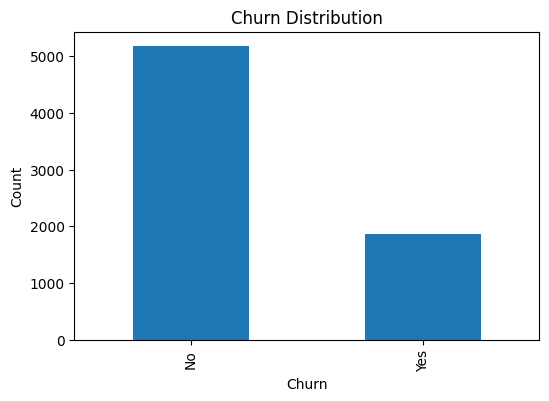

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


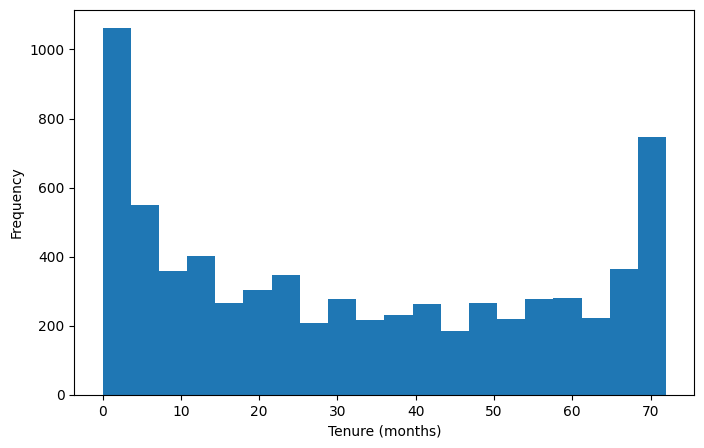

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['tenure'], bins=20)
plt.title("")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()


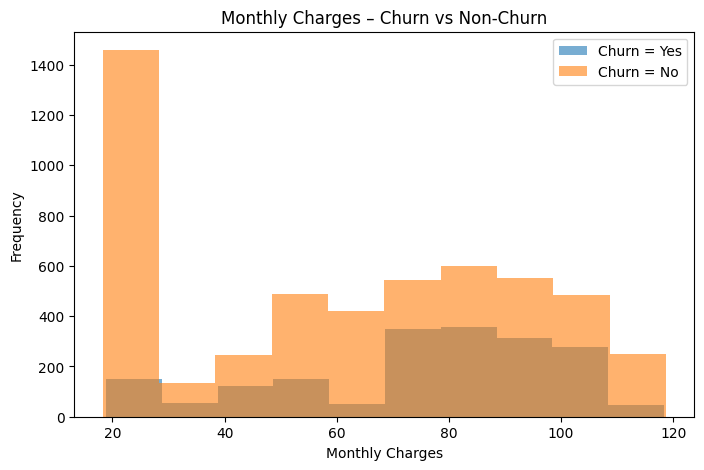

In [16]:
plt.figure(figsize=(8,5))
df[df['Churn']=="Yes"]['MonthlyCharges'].plot(kind='hist', alpha=0.6, label="Churn = Yes")
df[df['Churn']=="No"]['MonthlyCharges'].plot(kind='hist', alpha=0.6, label="Churn = No")
plt.legend()
plt.title("Monthly Charges – Churn vs Non-Churn")
plt.xlabel("Monthly Charges")
plt.show()


<Figure size 700x400 with 0 Axes>

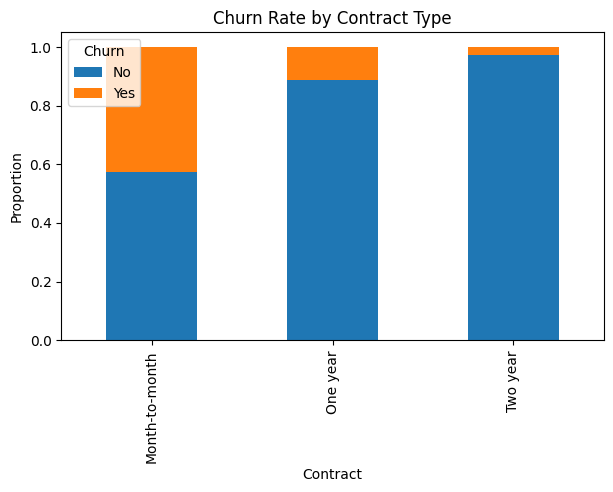

In [17]:
plt.figure(figsize=(7,4))
(df.groupby("Contract")['Churn']
   .value_counts(normalize=True)
   .unstack()
   .plot(kind='bar', stacked=True, figsize=(7,4)))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()


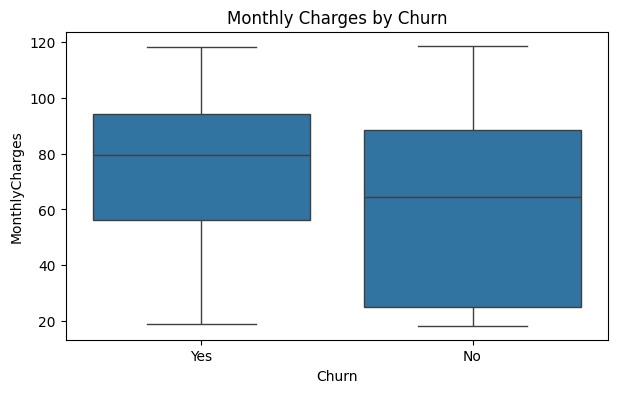

In [18]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


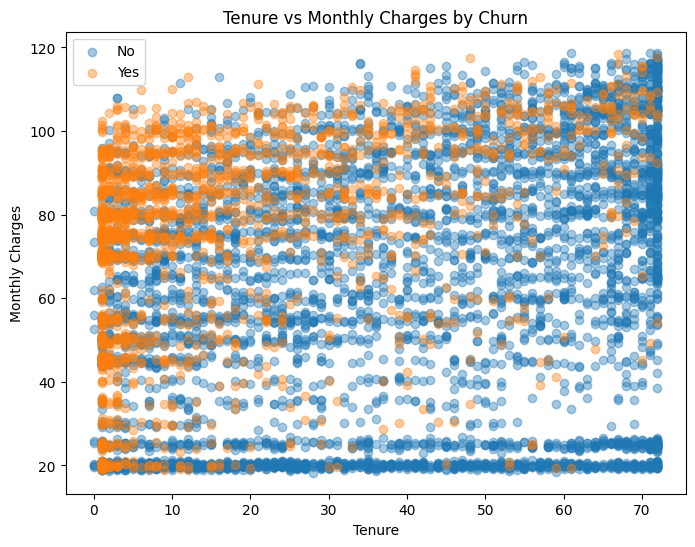

In [19]:
plt.figure(figsize=(8,6))
for label, group in df.groupby('Churn'):
    plt.scatter(group['tenure'], group['MonthlyCharges'], label=label, alpha=0.4)

plt.legend()
plt.title("Tenure vs Monthly Charges by Churn")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()


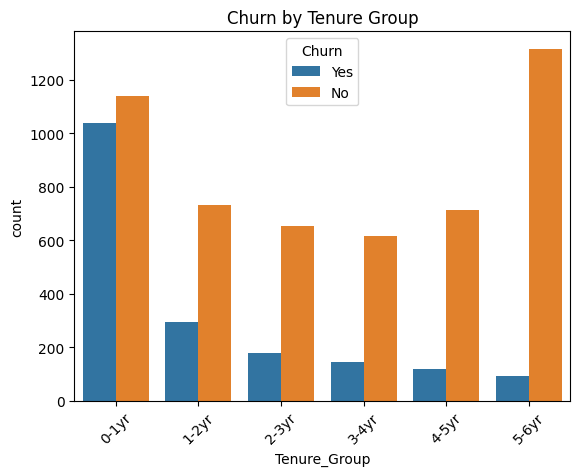

In [20]:
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=['0-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr'])
sns.countplot(x='Tenure_Group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.xticks(rotation=45)
plt.show()

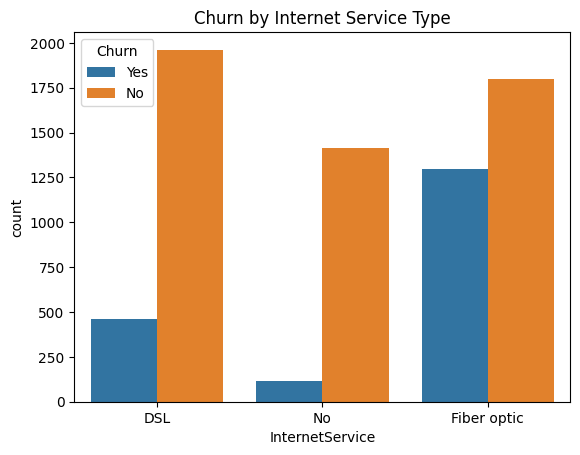

In [21]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()

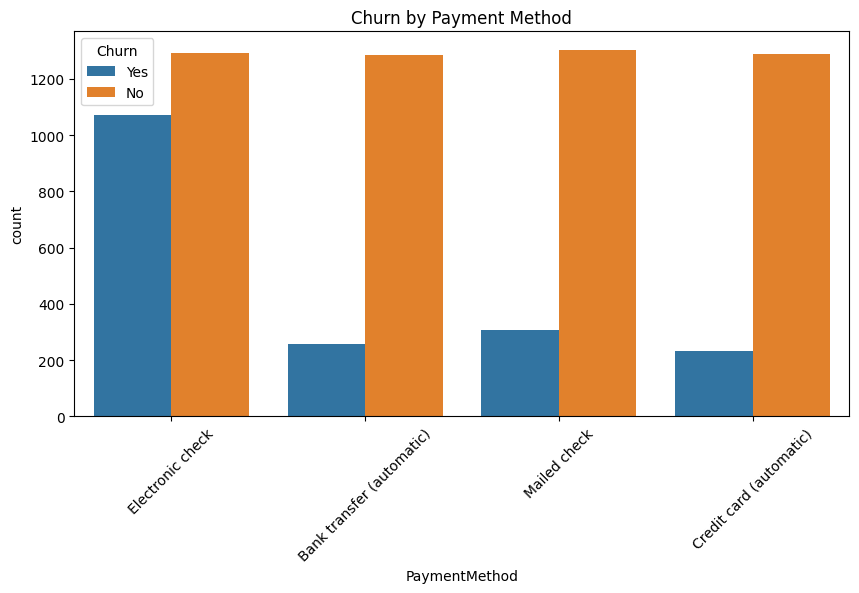

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

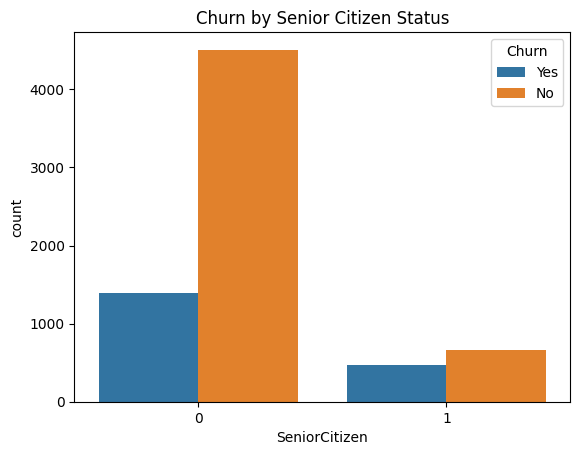

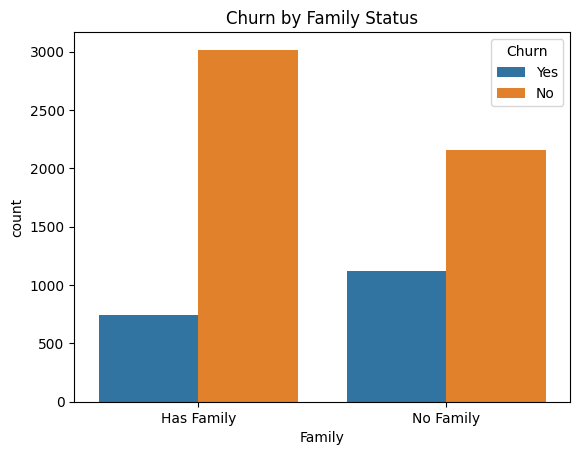

In [23]:
# Combine Partner and Dependents
df['Family'] = ((df['Partner']=='Yes') | (df['Dependents']=='Yes')).map({True:'Has Family', False:'No Family'})
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.show()

sns.countplot(x='Family', hue='Churn', data=df)
plt.title('Churn by Family Status')
plt.show()

# Data Preprocessing
clean, modular, production-ready Python preprocessing chunks for a Customer Churn Prediction System.

In [24]:
df = shuffle(df, random_state=42)

In [25]:
# Convert to numeric, coercing errors (' ' values) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
# Fill missing values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [27]:
df.drop('customerID', axis=1, inplace=True)

In [28]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [29]:
y = y.map({'Yes': 1, 'No': 0})

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
X.shape

(7043, 36)

In [32]:
y.shape

(7043,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

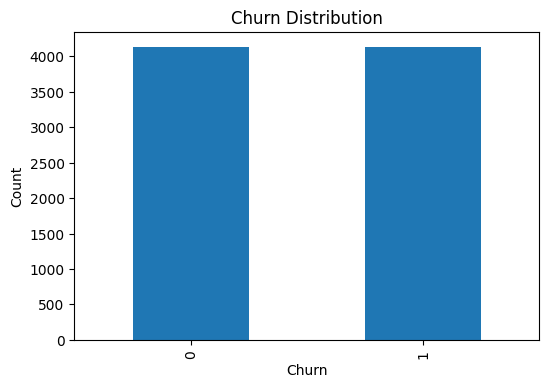

In [34]:
#balance the class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X_train, y_train)
# Display the balanced class diagram separated for yes no
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X.shape

(8278, 36)

In [39]:
y.shape

(8278,)

Treating the class imbalance

# Decision Tree Implementation
To develop an interpretable and effective Entropy-based Decision Tree model that predicts whether a customer is likely to churn using behavioral and demographic information.


Expected Outcomes

* A fully trained Entropy-based Decision Tree for churn prediction

* Identification of major factors influencing churn through information gain

* Performance metrics demonstrating prediction effectiveness

In [40]:
#Entropy tree
clf_entropy = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10
)

Training the model

In [41]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

Testing the model

In [42]:
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_entropy

array([0, 0, 0, ..., 1, 0, 0])

Evaluating the model

In [43]:
def evaluate_model(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    accuracy = accuracy_score(y_true, y_pred)

    model_name
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred,
                              target_names=['No Churn (0)', 'Churn (1)']))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return accuracy

Accuracy: 0.7828 (78.28%)

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.87      0.83      0.85      1035
   Churn (1)       0.58      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



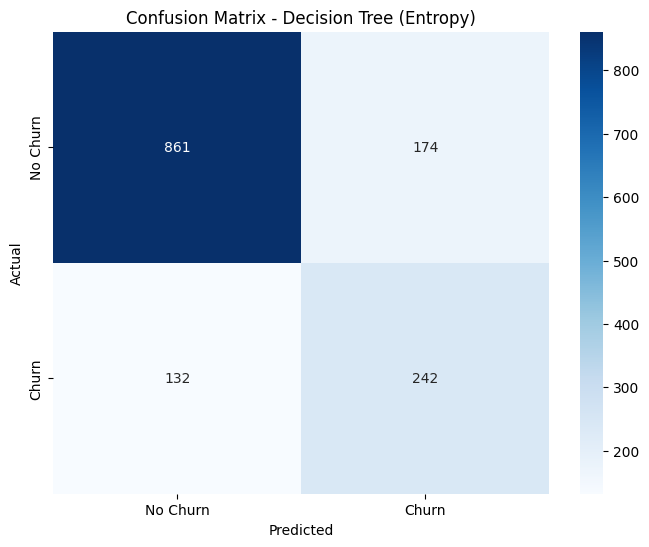

In [44]:
entropy_accuracy = evaluate_model(y_test, y_pred_entropy,"Decision Tree (Entropy)")

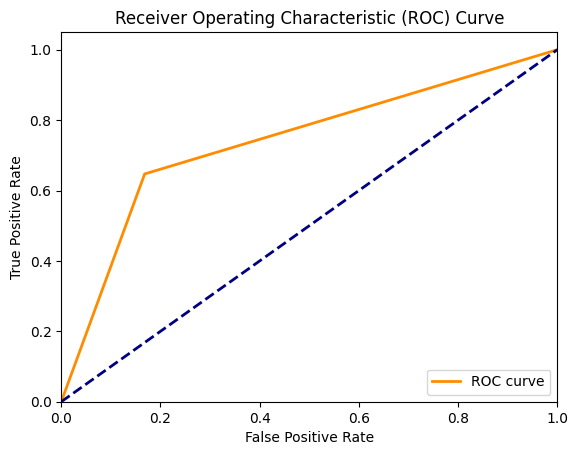

np.float64(0.7394714407502131)

In [45]:
#ROC curve for teh Decision tree
fpr, tpr, thresholds = roc_curve(y_test, y_pred_entropy)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#ROC accuracy
roc_auc_score(y_test, y_pred_entropy)



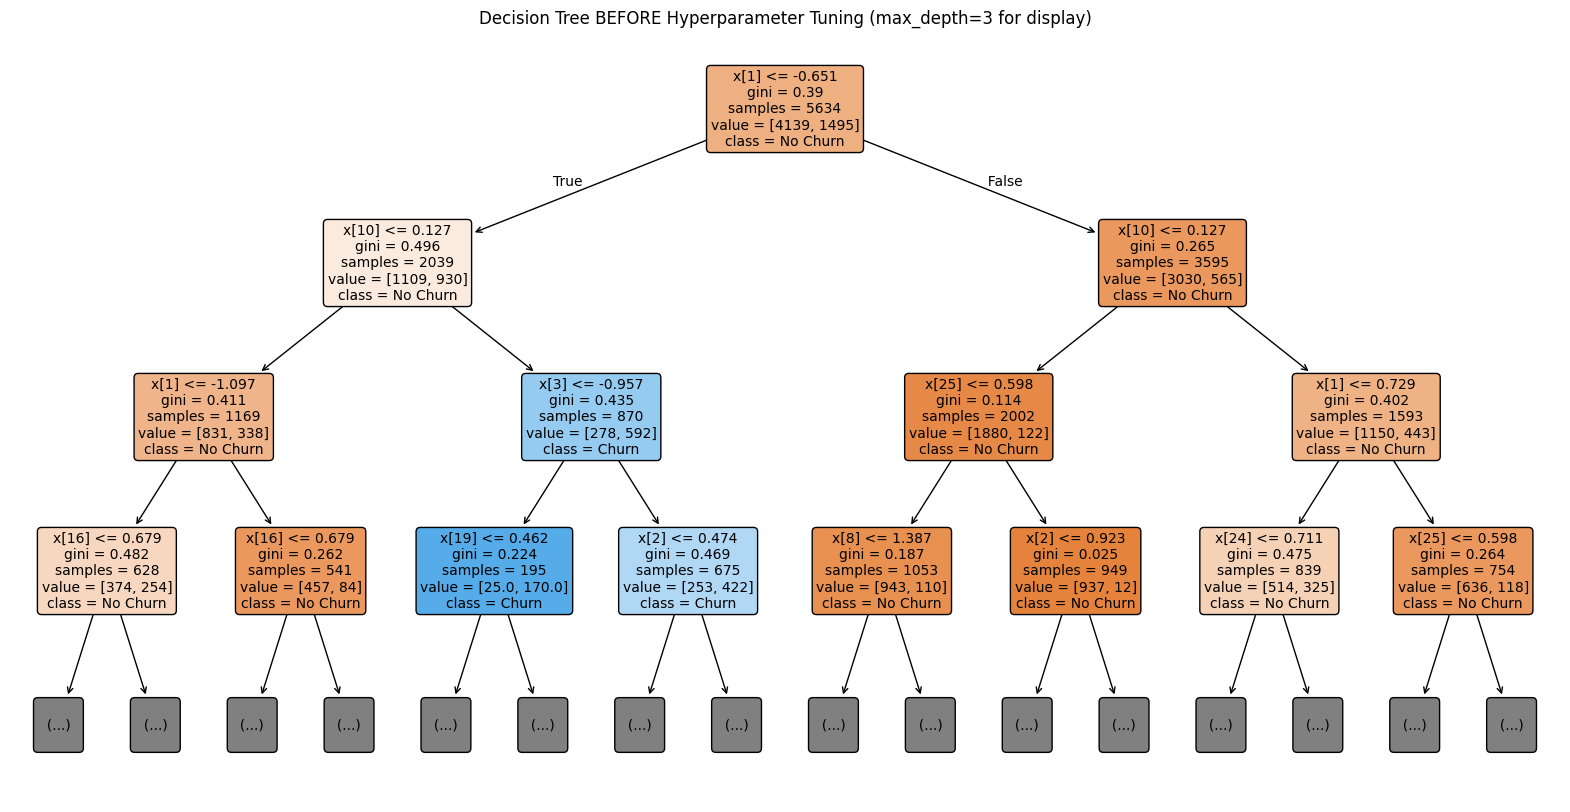

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Your original tree before tuning
dt_before = DecisionTreeClassifier(random_state=42)
dt_before.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_before,
               feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
               class_names=['No Churn', 'Churn'],
               filled=True,
               rounded=True,
               fontsize=10,
               max_depth=3)  # Limit depth for readability
plt.title("Decision Tree BEFORE Hyperparameter Tuning (max_depth=3 for display)")
plt.show()

In [47]:

input_dim = X_train.shape[1]

# This ANN will give you
* Fully functional ANN for churn classification
* Dropout to prevent overfitting
* Early stopping to avoid unnecessary training
* Accuracy, classification report, and confusion matrix
* Clean output ready for a report or notebook

In [48]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Input Layer + Hidden Layer 1
model.add(Dense(32, activation='relu', input_dim=input_dim))
model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# Output Layer (Binary Classification)
model.add(Dense(1, activation='sigmoid'))

In [50]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=100,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.6440 - loss: 0.6604 - val_accuracy: 0.7382 - val_loss: 0.4911
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7295 - loss: 0.5065 - val_accuracy: 0.7382 - val_loss: 0.4362
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4600 - val_accuracy: 0.7968 - val_loss: 0.4225
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4463 - val_accuracy: 0.7995 - val_loss: 0.4137
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7907 - loss: 0.4458 - val_accuracy: 0.7986 - val_loss: 0.4127
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8104 - loss: 0.4258 - val_accuracy: 0.7906 - val_loss: 0.4132
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.4241 - val_accuracy: 0.7888 - val_loss: 0.4078
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4280 - val_ac

In [53]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

# Confusion matrix
confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8027 (80.27%)
Precision: 0.6263157894736842
Recall: 0.6363636363636364
F1: 0.6312997347480106
ROC AUC: 0.7495827843653929
Confusion Matrix:
 [[893 142]
 [136 238]]


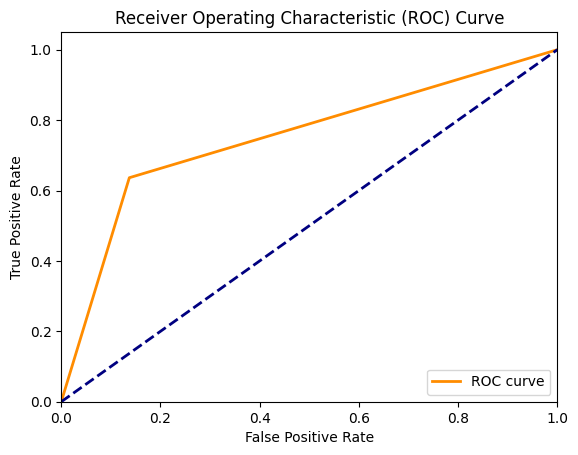

np.float64(0.7495827843653929)

In [52]:
#ROC curve for the ANN
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#ROC accuracy
roc_auc_score(y_test, y_pred)

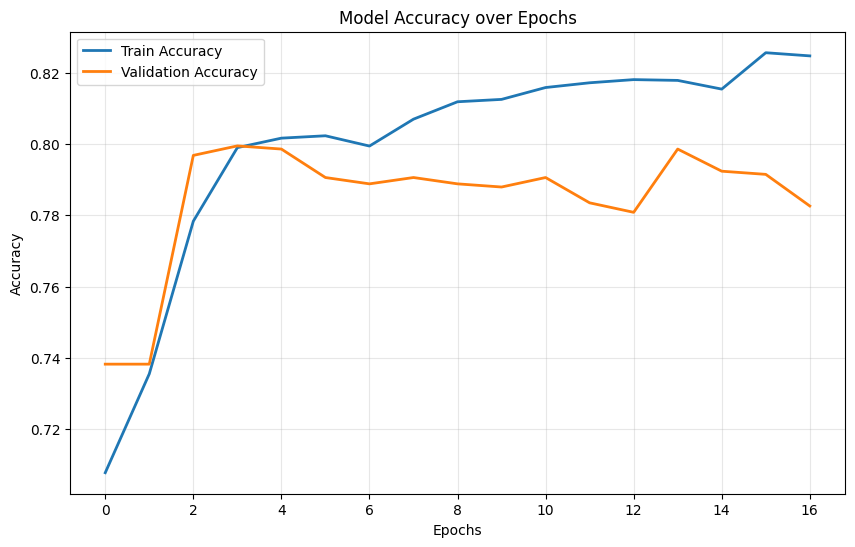

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

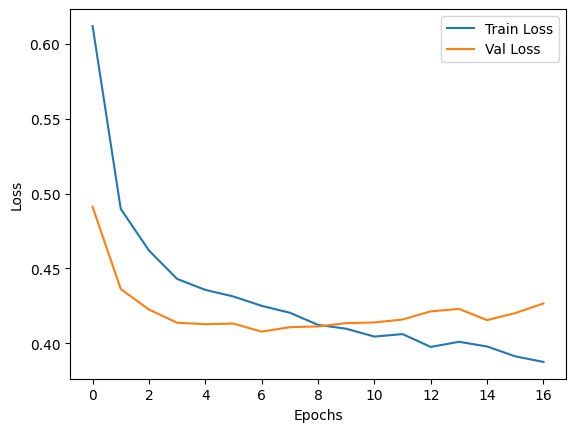

In [55]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

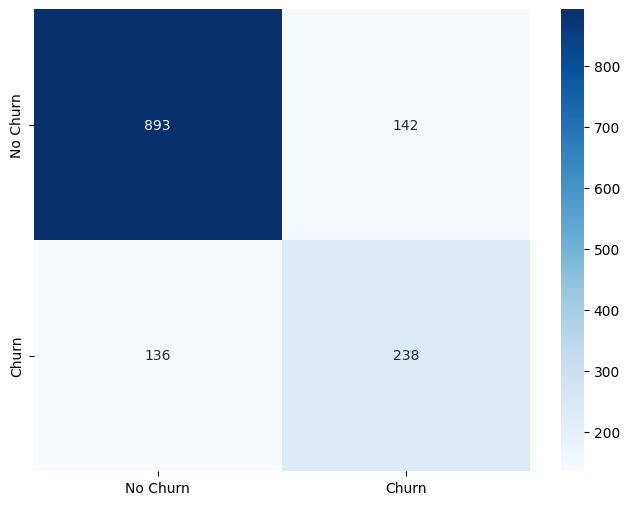

In [56]:
#Confusion metrix for the ANN
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt


* **Steady Decreasein Both Losses**: The training loss (blue) drops sharply at first and continues decreasing smoothly, while validation loss (orange) follows a similar downward trend. This shows your ANN is effectively learning patterns from the data without getting stuck.

* **Low Overfitting Evidence**: There's a small, consistent gap between train and validation loss, but it doesn't widen over epochs. This means your model generalizes well to unseen data and isn't memorizing the training set.

* **Stable Validation Performance**: After around epoch 10, validation loss flattens out without rising — a clear sign of convergence. No upward trend indicates no overfitting, even as training continues.

* **Healthy Convergence**: The model reaches a low loss (~0.40–0.45) by epoch 15–18, with both curves stabilizing. This is ideal for a small tabular dataset like Telco Churn, showing you've captured most learnable patterns.

* **No Red Flags Overall**: The curve is smooth, balanced, and plateaus naturally — classic signs of a well-trained, well-behaved ANN.

Hyper parameter tuning for the Decision Tree


In [52]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt_random = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
dt_random.fit(X_train, y_train)

dt_random.best_params_
dt_random.best_score_

# Use the best model
best_dt = dt_random.best_estimator_

# Evaluate on test set
y_pred_dt = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

Accuracy: 0.7764 (77.64%)


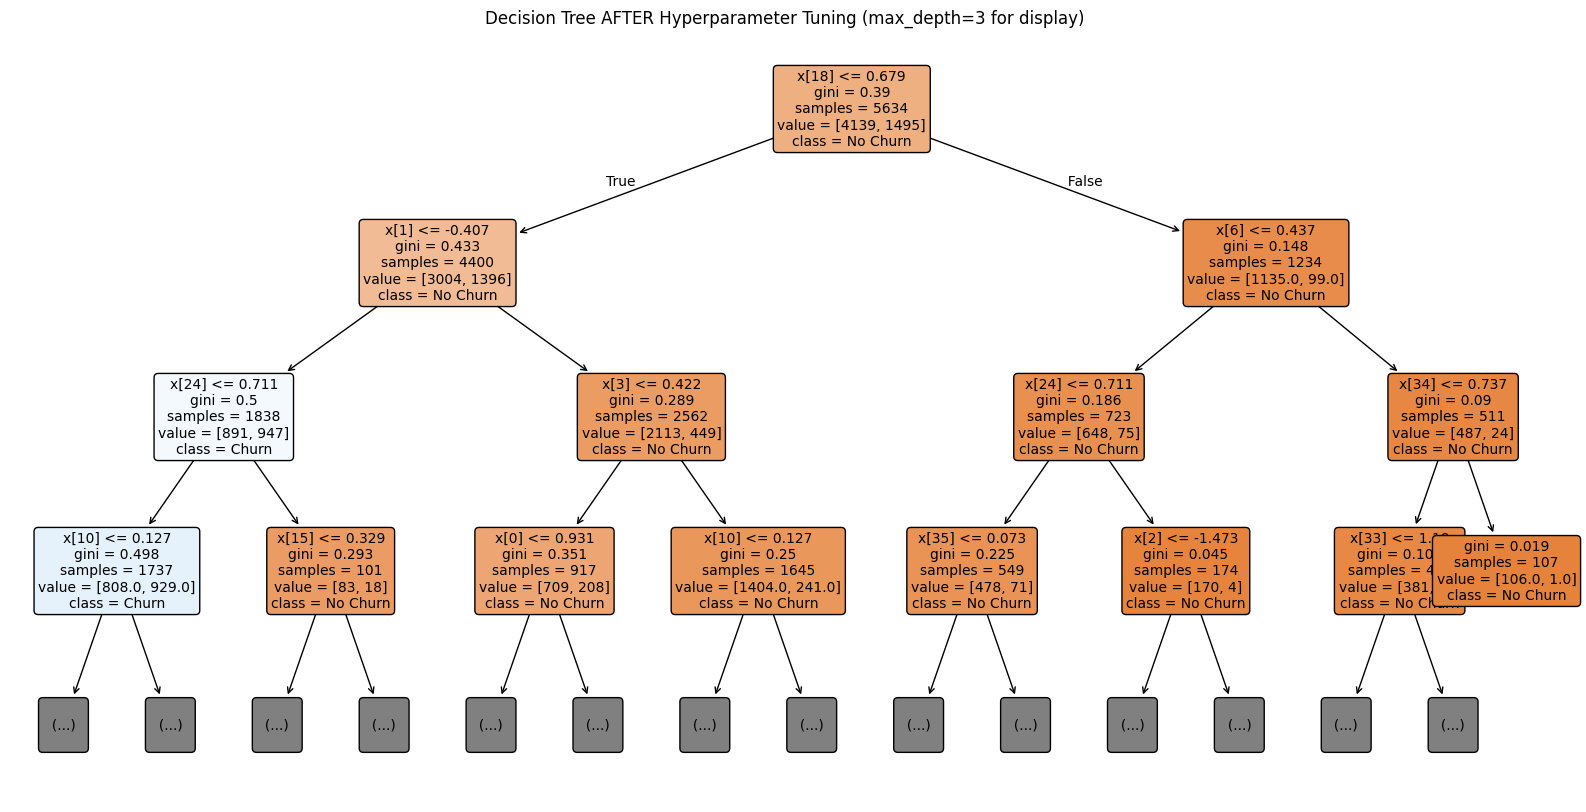

In [53]:
# Distribution if te decision tree after tuning
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt,
               feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
               class_names=['No Churn', 'Churn'],
               filled=True,
               rounded=True,
               fontsize=10,
               max_depth=3)  # Limit depth for readability
plt.title("Decision Tree AFTER Hyperparameter Tuning (max_depth=3 for display)")
plt.show()


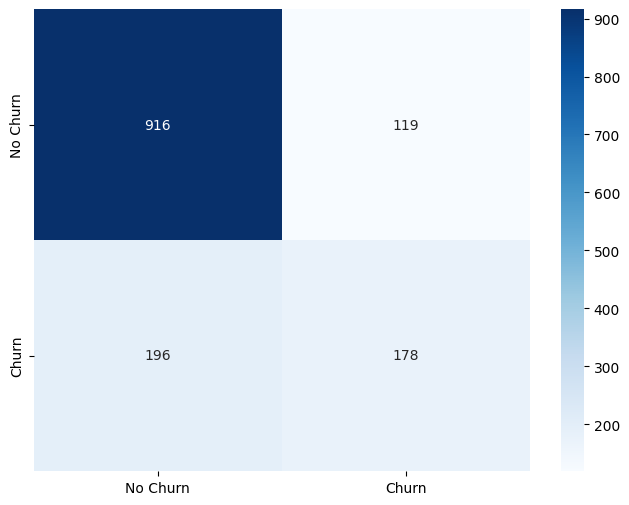

In [54]:
#Confusion metrix for Decision tree
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.show()

Tuning ANN

In [55]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}



In [56]:
def build_model(hp):
    model = keras.Sequential()

    # number of hidden layers
    for i in range(hp.Int("layers", 1, 3)):
        model.add(layers.Dense(
            units=hp.Int("units_" + str(i), min_value=32, max_value=256, step=32),
            activation="relu"
        ))
        model.add(layers.Dropout(hp.Float("dropout_" + str(i), 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation="sigmoid"))

    # learning rate
    lr = hp.Choice("lr", [1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="auc")]
    )

    return model

In [57]:
tuner = kt.Hyperband(
    build_model,
    objective="val_auc",
    max_epochs=30,
    factor=3,
    directory="tuning_dir",
    project_name="ann_churn"
)

stop_early = keras.callbacks.EarlyStopping(
    monitor="val_auc",
    patience=5,
    mode="max",
    restore_best_weights=True
)


In [58]:
tuner.search(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=64,
    callbacks=[stop_early],
    class_weight=class_weight_dict,
    verbose=2
)

best_model = tuner.get_best_models(1)[0]

Trial 90 Complete [00h 00m 16s]
val_auc: 0.8457645177841187

Best val_auc So Far: 0.8478221893310547
Total elapsed time: 00h 12m 52s


In [62]:
y_pred_prob = best_model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7352732434350603
Precision: 0.5008
Recall: 0.8368983957219251
F1: 0.6266266266266266
ROC AUC: 0.8476194166731251
Confusion Matrix:
 [[723 312]
 [ 61 313]]


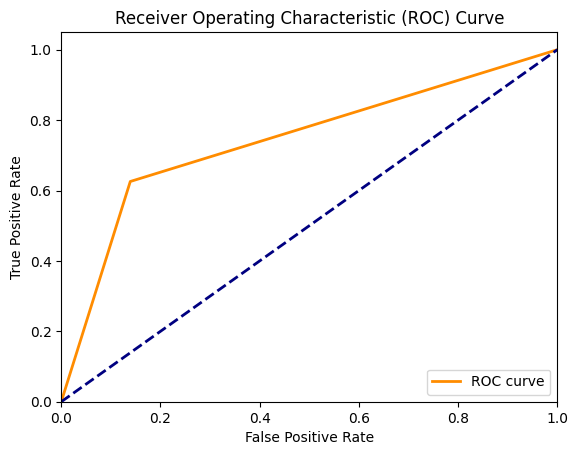

np.float64(0.743269007207626)

In [60]:
#ROC curve for the base ANN and the tuned ANN
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#ROC accuracy
roc_auc_score(y_test, y_pred)

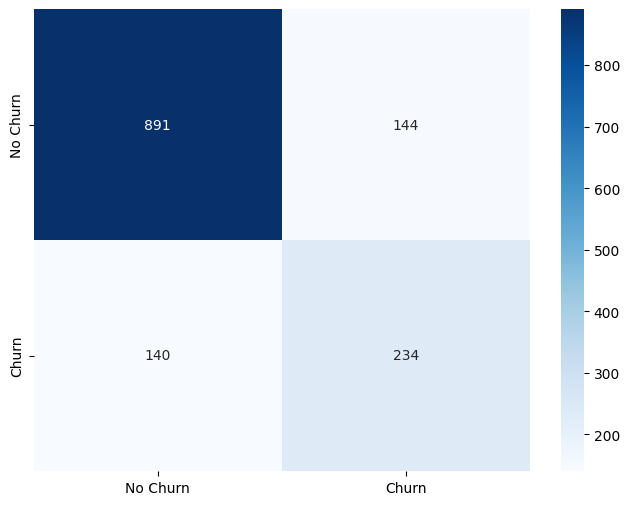

In [61]:
#Confusion metrix for the ANN ater tuning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.show()
